In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ca.set_log_level(11)

In [4]:
%matplotlib inline

In [5]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
## The same dataset was used with two denoisers: Deblur and DADA2
## using default parameters
### Original fastq files from:
16S rRNA Amplicon Sequencing of Urban Prokaryotic Communities in the South Bronx River Estuary.

Naro-Maciel, E., Ingala, M.R., Werner, I.E. and Fitzgerald, A.M., 2020.

Microbiology Resource Announcements, 9(22), pp.e00182-20.

https://doi.org/10.1128/MRA.00182-20

In [6]:
datdeblur=ca.read_amplicon('./table.deblur.biom','./map.txt',normalize=10000,min_reads=1000)

2023-05-11 15:24:18 INFO loaded 33 samples, 8930 features
2023-05-11 15:24:18 INFO Loaded 33 samples, 8930 features
2023-05-11 15:24:18 INFO After filtering, 33 samples remaining.


In [7]:
datdada=ca.read_qiime2('./table.dada2.qza','./map.txt',min_reads=1000,normalize=10000)

2023-05-11 15:24:19 INFO loaded 144 samples, 69000 features
2023-05-11 15:24:19 WARNING Found 111 samples that have data but do not have metadata.
2023-05-11 15:24:19 INFO First 5 samples without metadata: ['SRR14830789', 'SRR14895541', 'SRR14907154', 'SRR14830784', 'SRR14830818']
2023-05-11 15:24:20 INFO Loaded 144 samples, 69000 features
2023-05-11 15:24:20 INFO After filtering, 144 samples remaining.


In [8]:
datdada=datdada.filter_samples('Collection_Date',None)
datdada

AmpliconExperiment with 33 samples, 69000 features

In [9]:
datdeblurc=datdeblur.cluster_features(10)
datdadac=datdada.cluster_features(10)

2023-05-11 15:24:20 INFO After filtering, 2726 features remaining.
2023-05-11 15:24:20 INFO After filtering, 3621 features remaining.


# Let's look at the two experiments together to see how similar they look

In [10]:
exp=datdeblurc.join_experiments(datdadac,field='exp',labels=['deblur','dada2'],prefixes=['deblur','dada2'])
exp=cu.trim_seqs(exp,150)
exp=exp.cluster_features(10)

2023-05-11 15:24:20 INFO Both experiments contain same sample IDs - adding prefixes
2023-05-11 15:24:24 INFO After filtering, 3991 features remaining.


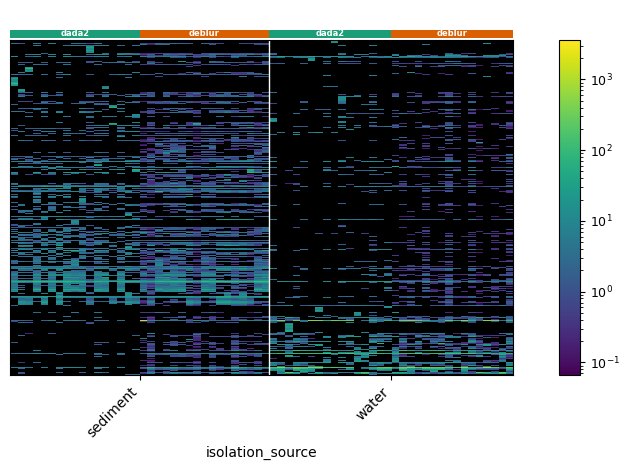

In [11]:
exp=exp.sort_samples('exp')
exp = exp.sort_samples('isolation_source')
exp.plot(sample_field='isolation_source',gui='cli',barx_fields=['exp'])
# cu.splot(exp,'isolation_source',barx_fields=['exp'])

# We will look at the water samples

In [12]:
waterdeblur=datdeblurc.filter_samples('isolation_source','water')
waterdeblur=waterdeblur.cluster_features(10)
waterdeblur.sample_metadata.geo_loc_name.value_counts()

2023-05-11 15:24:26 INFO After filtering, 905 features remaining.


USA: Soundview Park                8
USA: Hunts Point Riverside Park    8
Name: geo_loc_name, dtype: int64

In [13]:
waterdada=datdadac.filter_samples('isolation_source','water')
waterdada=waterdada.cluster_features(10)
waterdada.sample_metadata.geo_loc_name.value_counts()

2023-05-11 15:24:26 INFO After filtering, 1348 features remaining.


USA: Soundview Park                8
USA: Hunts Point Riverside Park    8
Name: geo_loc_name, dtype: int64

# Compare the two collection locations
## Using both deblur and dada2 datasets

### Create the enriched terms barplot

In [14]:
dd_deblur=waterdeblur.diff_abundance('location','Hunts Point','Soundview Park',random_seed=2022)
dd_dada=waterdada.diff_abundance('location','Hunts Point','Soundview Park',random_seed=2022)

2023-05-11 15:24:32 INFO 16 samples with both values
2023-05-11 15:24:32 INFO After filtering, 905 features remaining.
2023-05-11 15:24:32 INFO 8 samples with value 1 (Hunts Point), 8 samples with value2 (Soundview Park)
2023-05-11 15:24:33 INFO number of higher in Hunts Point: 30. number of higher in Soundview Park : 106. total 136
2023-05-11 15:24:33 INFO 16 samples with both values
2023-05-11 15:24:33 INFO After filtering, 1348 features remaining.
2023-05-11 15:24:33 INFO 8 samples with value 1 (Hunts Point), 8 samples with value2 (Soundview Park)
2023-05-11 15:24:34 INFO number of higher in Hunts Point: 30. number of higher in Soundview Park : 84. total 114


2023-05-11 15:24:38 INFO Getting dbBact annotations for 136 sequences, please wait...
2023-05-11 15:24:38 INFO Limited to maximal annotationid: 7440
2023-05-11 15:24:40 INFO got 978 annotations
2023-05-11 15:24:40 WARNING ignoring 85 annotation with id > max_id 7440
2023-05-11 15:24:40 INFO Got 4131 annotation-sequence pairs
2023-05-11 15:24:40 INFO Added annotation data to experiment. Total 893 annotations, 136 ASVs
2023-05-11 15:24:40 INFO Found 1 experiments ([722]) matching current experiment - ignoring them.
2023-05-11 15:24:42 INFO found 7 negative
2023-05-11 15:24:42 INFO found 7 positive


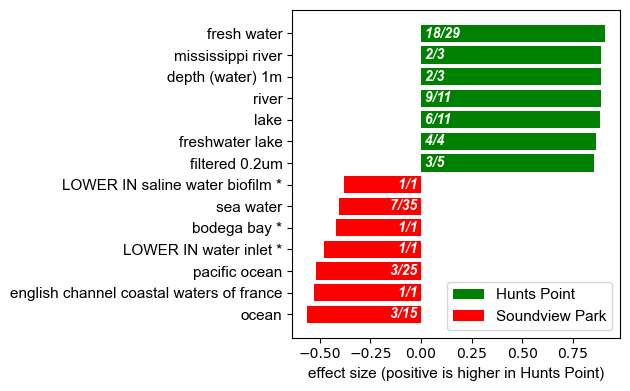

In [15]:
f,e=dd_deblur.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [16]:
f.figure.savefig('deblur_diff_abundance.pdf',dpi=300)

2023-05-11 15:24:52 INFO Getting dbBact annotations for 114 sequences, please wait...
2023-05-11 15:24:52 INFO Limited to maximal annotationid: 7440
2023-05-11 15:24:55 INFO got 1816 annotations
2023-05-11 15:24:55 WARNING ignoring 190 annotation with id > max_id 7440
2023-05-11 15:24:55 INFO Got 4343 annotation-sequence pairs
2023-05-11 15:24:55 INFO Added annotation data to experiment. Total 1626 annotations, 114 ASVs
2023-05-11 15:24:55 WARNING No experiment found matching the details [['DataMD5', 'e21e8819d4d1e10082e631d8a5ecd0f2'], ['MapMD5', '29f5fc13d844a0f833ba1859d5558e23']]
2023-05-11 15:24:55 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2023-05-11 15:24:57 INFO found 7 negative
2023-05-11 15:24:58 INFO found 7 positive


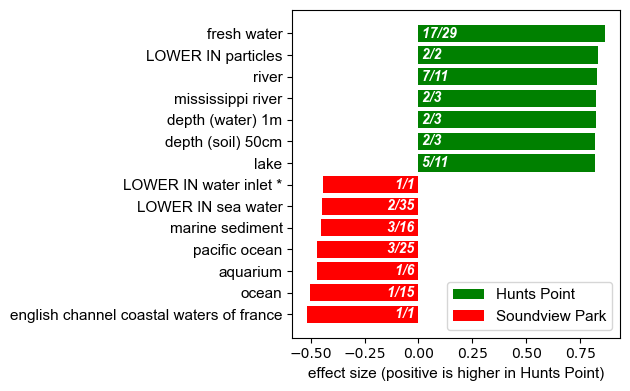

In [17]:
fdada,edada=dd_dada.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [18]:
fdada.figure.savefig('dada2_diff_abundance.pdf',dpi=300)

### Create the enriched terms scatter plot
(for this we need to use FDR=1) to get also the non-significant scores so we can compare

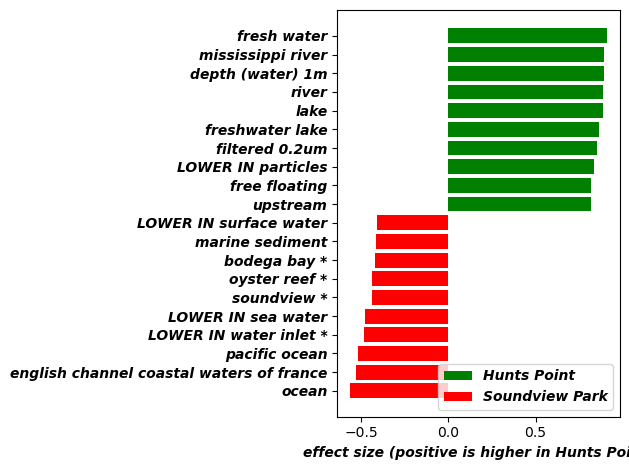

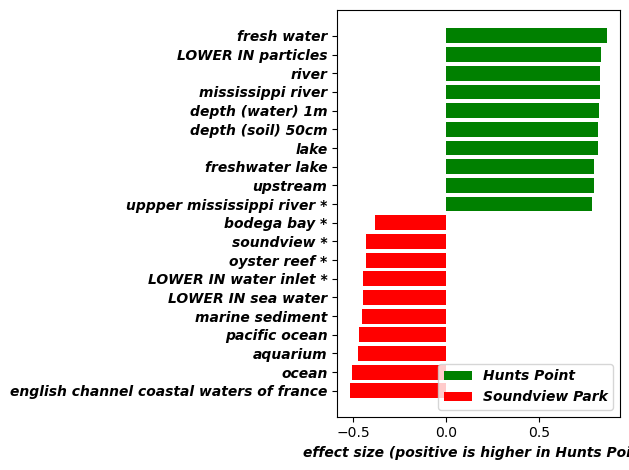

In [19]:
fdeblur,edeblur=dd_deblur.plot_diff_abundance_enrichment(alpha=1)
fdada,edada=dd_dada.plot_diff_abundance_enrichment(alpha=1)

In [20]:
df1=edeblur.feature_metadata.copy()
df2=edada.feature_metadata.copy()
# df2['odif_dada']=df2['odif']
# df1['odif_deblur']=df1['odif']
# outer join the two dataframes (df1,df2) based on the index and give different names to the columns
dfm=df1.join(df2,how='outer',lsuffix='_deblur',rsuffix='_dada2')

Text(0, 0.5, 'Term effect size (DADA2)')

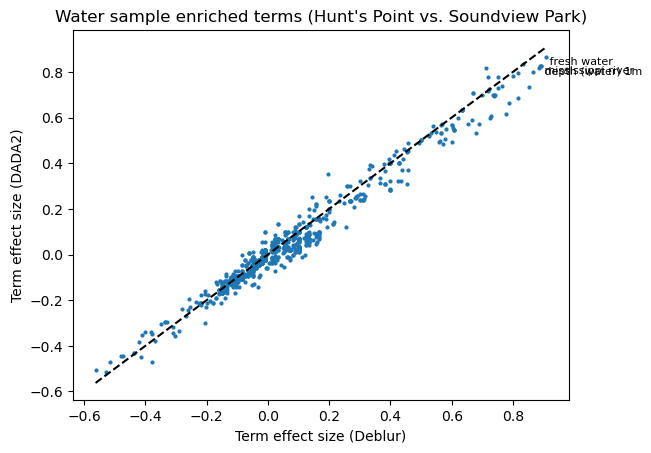

In [21]:
f=plt.figure()
plt.scatter(dfm['odif_deblur'],dfm['odif_dada2'],s=4)
# plot a 1-1 diagonal from the min to the max odif (on both axes)
maxval = max(dfm['odif_deblur'].max(),dfm['odif_dada2'].max())
minval = min(dfm['odif_deblur'].min(),dfm['odif_dada2'].min())
plt.plot([minval,maxval],[minval,maxval],'k--')

# sort the dataframe by the deblur effect size
dfm=dfm.sort_values('odif_deblur',ascending=False)
# add a text label to the top 5 terms with the largest deblue effect size
for i in range(3):
    plt.text(dfm.iloc[i]['odif_deblur'],dfm.iloc[i]['odif_dada2'],' '+dfm.iloc[i]['term_deblur'],fontsize=8,c='k',horizontalalignment='left',verticalalignment='top')

plt.title('Water sample enriched terms (Hunt\'s Point vs. Soundview Park)')
plt.xlabel('Term effect size (Deblur)')
plt.ylabel('Term effect size (DADA2)')


In [22]:
f.savefig('fig-enrichment-deblur-vs-dada2.pdf',dpi=300)

### Compare wordcloud f-scores for the common sequences in the two methods

In [23]:
ttdeblur=waterdeblur.filter_prevalence(0.5)
ttdada=waterdada.filter_prevalence(0.5)
wcttdeblur=db.get_wordcloud_stats(ttdeblur)
wcttdada=db.get_wordcloud_stats(ttdada)

2023-05-11 14:54:12 INFO After filtering, 301 features remaining.
2023-05-11 14:54:12 INFO After filtering, 312 features remaining.
2023-05-11 14:54:12 INFO Getting dbBact annotations for 301 sequences, please wait...
2023-05-11 14:54:16 INFO got 1486 annotations
2023-05-11 14:54:16 INFO Got 9947 annotation-sequence pairs
2023-05-11 14:54:16 INFO Added annotation data to experiment. Total 1486 annotations, 301 ASVs
2023-05-11 14:54:16 INFO Getting dbBact annotations for 312 sequences, please wait...
2023-05-11 14:54:21 INFO got 2166 annotations
2023-05-11 14:54:21 INFO Got 11445 annotation-sequence pairs
2023-05-11 14:54:21 INFO Added annotation data to experiment. Total 2166 annotations, 312 ASVs


In [24]:
fdeblur=wcttdeblur[0]
fdada=wcttdada[0]

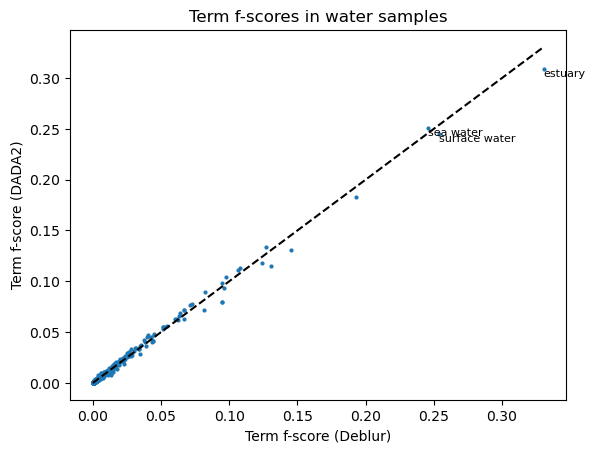

In [25]:
f=plt.figure()
all_terms = list(set(list(fdeblur.keys())+list(fdada.keys())))
xdeb=[]
ydada=[]
for t in all_terms:
    xdeb.append(fdeblur.get(t,0))
    ydada.append(fdada.get(t,0))
# get the maximal value for both axes
maxval = max(max(xdeb),max(ydada))

plt.scatter(xdeb,ydada,s=4)
plt.plot([0,maxval],[0,maxval],'k--')
plt.xlabel('Term f-score (Deblur)')
plt.ylabel('Term f-score (DADA2)')
plt.title('Term f-scores in water samples')

# add a text label to the 3 terms with the largest deblue effect size
for i in range(3):
    maxidx=np.argmax(xdeb)
    plt.text(xdeb[maxidx],ydada[maxidx],all_terms[maxidx],fontsize=8,c='k',horizontalalignment='left',verticalalignment='top')
    # # color the point red
    # plt.scatter(xdeb[maxidx],ydada[maxidx],s=4,c='r')
    xdeb[maxidx]=0
    ydada[maxidx]=0

In [26]:
f.savefig('fig-fscores-deblur-vs-dada2.pdf',dpi=300)